In [1]:
# Loading libraries
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Saving instruction file
df = pd.read_csv('ins.csv')
instructions = df["ins"].to_list()
out_text=''
for word in instructions:
        out_text+=word[1:-1]+" "
f = open("ins.mem", "w")
f.write(out_text[:-1])
f.close()

In [4]:
# Function to convert image to .mem file
def to_text(image_name, text_name):
    image = cv.imread(image_name, flags=cv.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.show()
    height = image.shape[0]
    width = image.shape[1]
    text = ""
    text += '{0:016b}'.format(height)
    text += '{0:016b}'.format(width)
    text += '{0:016b}'.format(height*width)
    image = np.ndarray.flatten(image)
    for pix in image:
        text += '{0:08b}'.format(pix)
    n = 8 
    text = [text[i:i+n] for i in range(0, len(text), n)]
    out_text=''
    for word in text:
        out_text+=word+" "
    f = open(text_name, "w")
    f.write(out_text[:-1])
    f.close()
    return True

### Run cell below to generate the text file to feed into data memory

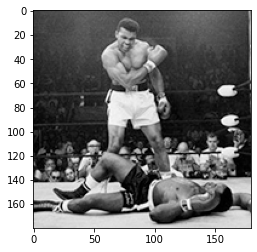

True

In [5]:
to_text(image_name="image.png", text_name="image.mem") # Other images to choose: "image_1.png", "image_2.png"

### If the new image is not downscaled yet using the processor, run the simulation

In [6]:
#Loading original image

f = open("image.mem", "r")
text = f.read().split(" ")
memory = []
for pix in range(0,6,2):
    memory.append(int(text[pix]+text[pix+1], 2))
for pix in range(6,len(text)):
    memory.append(int(text[pix], 2))
f.close()

height = memory[0]
width = memory[1]
original = memory[3:]
original = np.array(original)
original = np.reshape(original, (height, width))

### Run cell below to downscale image **without** using floating point operations in python

In [15]:
f = open("image.mem", "r")
memory = f.read().split(" ")

#Horizontal filtering
height = int(memory[0]+memory[1], 2) ##
height_cons = height##
width = int(memory[2]+memory[3], 2)##
width_cons = width##
end = int(memory[4]+memory[5], 2)##
memory = memory + [0]*end##
end = end + 6##
pixel = 6##
while height!=0:##
    b = int(memory[pixel], 2)//2##
    c = pixel+1##
    c = int(memory[c],2)//4##
    c = b + c##
    memory[end] = c##
    pixel = pixel + 1##
    end = end + 1##
    while width-2!=0:##
        a = pixel - 1##
        a = int(memory[a], 2)//4##
        b = int(memory[pixel], 2)//2##
        b = a + b##
        c = pixel + 1##
        c = int(memory[c],2)//4##
        c = b + c##
        memory[end] = c##
        pixel = pixel + 1##
        end = end + 1##
        width = width - 1##
    a = pixel - 1##
    a = int(memory[a], 2)##
    a = a//4##
    b = int(memory[pixel],2)##
    b = b//2##
    b = a + b##
    memory[end] = b##
    pixel = pixel + 1##
    end = end + 1##
    height = height - 1#
    width = width_cons##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
horizontal = memory[heightq*widthq+6:]
horizontal = np.array(horizontal)
horizontal = np.reshape(horizontal, (heightq, widthq))
print('here 1')

#Vertical filtering
height = height_cons##
width = width_cons##
pixel = int(memory[4]+memory[5], 2)##
pixel = pixel + 6##
pixel_cons = pixel##
end = 6##
end_cons = end##
while width!=0:##
    b = memory[pixel]//2##
    c = pixel + width_cons##
    c = memory[c]//4##
    c = b + c##
    memory[end] = c##
    pixel = pixel + width_cons##
    end = end + width_cons##
    while height-2!=0:##
        a = pixel - width_cons##
        a = memory[a]//4##
        b = memory[pixel]//2##
        b = a + b##
        c = pixel + width_cons##
        c = memory[c]//4##
        c = b + c##
        memory[end] = c##
        pixel = pixel + width_cons##
        end = end + width_cons##
        height = height - 1##
    a = pixel - width_cons##
    a = memory[a]//4##
    b = memory[pixel]//2##
    b = a + b##
    memory[end] = b##
    width = width - 1##
    pixel_cons = pixel_cons + 1##
    end_cons = end_cons + 1##
    pixel = pixel_cons##
    end = end_cons##
    height = height_cons##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
converted = memory[6:heightq*widthq+6]
converted = np.array(converted)
converted = np.reshape(converted, (heightq, widthq))
print("here 2")

#Down Sampling
height = height_cons##
width = width_cons##
end = int(memory[4]+memory[5], 2)##
end = end + 6##
pixel = 6##
while height!=0:##
    while width!=0:##
        b = memory[pixel]##
        memory[end] = b##
        pixel = pixel + 2##
        end = end + 1##
        width = width - 2##
    width = width_cons##
    pixel = pixel + width_cons##
    height = height - 2##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
downed = memory[heightq*widthq+6:heightq*widthq+6+heightq//2*widthq//2]
downed = np.array(downed)
downed= np.reshape(downed, (heightq//2, widthq//2))
print("here 3")

here 1
here 2
here 3


### Run cell below to downscale image **using floating point operations** in python

In [12]:
f = open("image.mem", "r")
memory = f.read().split(" ")

#Horizontal filtering
height = int(memory[0]+memory[1], 2) ##
height_cons = height##
width = int(memory[2]+memory[3], 2)##
width_cons = width##
end = int(memory[4]+memory[5], 2)##
memory = memory + [0]*end##
end = end + 6##
pixel = 6##
while height!=0:##
    b = int(memory[pixel], 2)/2##
    c = pixel+1##
    c = int(memory[c],2)/4##
    c = b + c##
    memory[end] = c##
    pixel = pixel + 1##
    end = end + 1##
    while width-2!=0:##
        a = pixel - 1##
        a = int(memory[a], 2)/4##
        b = int(memory[pixel], 2)/2##
        b = a + b##
        c = pixel + 1##
        c = int(memory[c],2)/4##
        c = b + c##
        memory[end] = c##
        pixel = pixel + 1##
        end = end + 1##
        width = width - 1##
    a = pixel - 1##
    a = int(memory[a], 2)##
    a = a/4##
    b = int(memory[pixel],2)##
    b = b/2##
    b = a + b##
    memory[end] = b##
    pixel = pixel + 1##
    end = end + 1##
    height = height - 1#
    width = width_cons##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
horizontal = memory[heightq*widthq+6:]
horizontal = np.array(horizontal)
horizontal_float = np.reshape(horizontal, (heightq, widthq))
print('here 1')

#Vertical filtering
height = height_cons##
width = width_cons##
pixel = int(memory[4]+memory[5], 2)##
pixel = pixel + 6##
pixel_cons = pixel##
end = 6##
end_cons = end##
while width!=0:##
    b = memory[pixel]/2##
    c = pixel + width_cons##
    c = memory[c]/4##
    c = b + c##
    memory[end] = c##
    pixel = pixel + width_cons##
    end = end + width_cons##
    while height-2!=0:##
        a = pixel - width_cons##
        a = memory[a]/4##
        b = memory[pixel]/2##
        b = a + b##
        c = pixel + width_cons##
        c = memory[c]/4##
        c = b + c##
        memory[end] = c##
        pixel = pixel + width_cons##
        end = end + width_cons##
        height = height - 1##
    a = pixel - width_cons##
    a = memory[a]/4##
    b = memory[pixel]/2##
    b = a + b##
    memory[end] = b##
    width = width - 1##
    pixel_cons = pixel_cons + 1##
    end_cons = end_cons + 1##
    pixel = pixel_cons##
    end = end_cons##
    height = height_cons##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
converted = memory[6:heightq*widthq+6]
converted = np.array(converted)
converted_float = np.reshape(converted, (heightq, widthq))
print("here 2")

#Down Sampling
height = height_cons##
width = width_cons##
end = int(memory[4]+memory[5], 2)##
end = end + 6##
pixel = 6##
while height!=0:##
    while width!=0:##
        b = memory[pixel]##
        memory[end] = b##
        pixel = pixel + 2##
        end = end + 1##
        width = width - 2##
    width = width_cons##
    pixel = pixel + width_cons##
    height = height - 2##

heightq = int(memory[0]+memory[1], 2)
widthq = int(memory[2]+memory[3], 2)
downed = memory[heightq*widthq+6:heightq*widthq+6+heightq//2*widthq//2]
downed = np.array(downed)
downed_float = np.reshape(downed, (heightq//2, widthq//2))
print("here 3")

here 1
here 2
here 3


### Run cell below to load the image our processor downsampled

In [13]:
f = open("DMem_out.mem", "r")
text = f.read().split('\n')
f.close()

memory = []
for pix in range(0,6,2):
    memory.append(int(text[pix]+text[pix+1], 2))
for pix in range(6,len(text)):
    try:
        memory.append(int(text[pix], 2))
    except (ValueError):
        break
print(len(memory))

converted_our = memory[3:memory[2]+3]
converted_our = np.array(converted_our)
converted_our = np.reshape(converted_our, (memory[0], memory[1]))

downed_our = memory[memory[2]+3:memory[2]+3+(memory[0]//2)*(memory[1]//2)]
downed_our = np.array(downed_our)
downed_our = np.reshape(downed_our, (memory[0]//2, memory[1]//2))

64803


### Plotting python **non floating** operation results

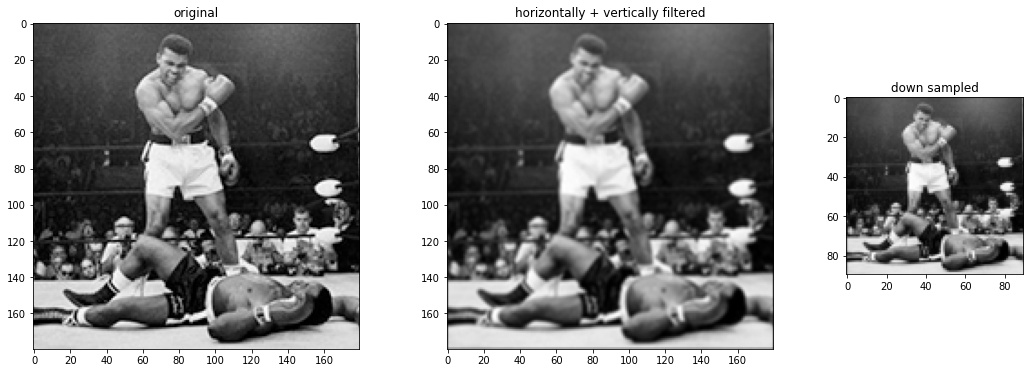

In [17]:
figure, axes = plt.subplots(1, 3, figsize=(18,6), gridspec_kw={'width_ratios': [2,2, 1]})
axes[0].imshow(original, cmap='gray')
axes[0].set_title("original")
axes[1].imshow(converted, cmap='gray')
axes[1].set_title("horizontally + vertically filtered")
axes[2].imshow(downed, cmap='gray')
axes[2].set_title("down sampled")
plt.show()
figure.savefig("python_conversion.jpeg", pad_inches=0.1, bbox_inches='tight')

### Plotting python **floating** operation results

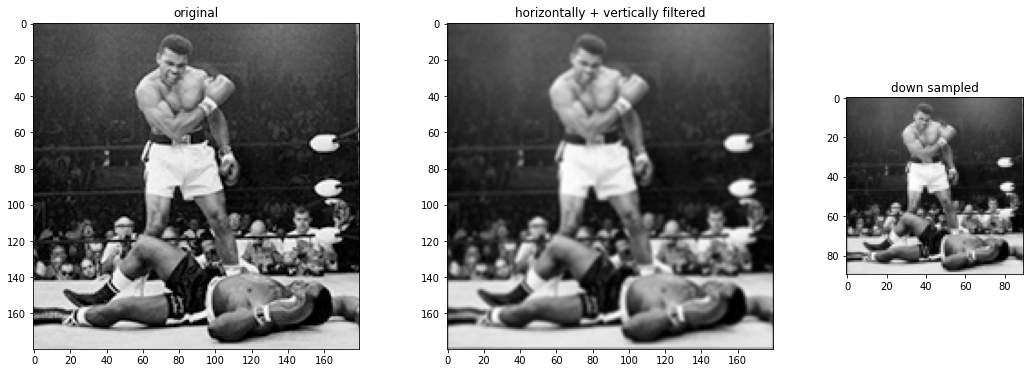

In [18]:
figure, axes = plt.subplots(1, 3, figsize=(18,6), gridspec_kw={'width_ratios': [2,2, 1]})
axes[0].imshow(original, cmap='gray')
axes[0].set_title("original")
axes[1].imshow(converted_float, cmap='gray')
axes[1].set_title("horizontally + vertically filtered")
axes[2].imshow(downed_float, cmap='gray')
axes[2].set_title("down sampled")
plt.show()
figure.savefig("python_conversion.jpeg", pad_inches=0.1, bbox_inches='tight')

### Plotting our results

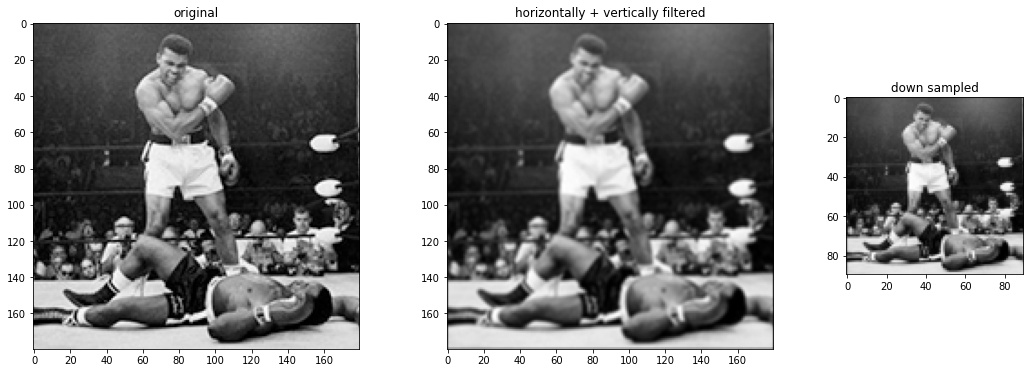

In [19]:
figure, axes = plt.subplots(1, 3, figsize=(18,6), gridspec_kw={'width_ratios': [2,2, 1]})
axes[0].imshow(original, cmap='gray')
axes[0].set_title("original")
axes[1].imshow(converted_our, cmap='gray')
axes[1].set_title("horizontally + vertically filtered")
axes[2].imshow(downed_our, cmap='gray')
axes[2].set_title("down sampled")
plt.show()
figure.savefig("our_conversion.jpeg", pad_inches=0.1, bbox_inches='tight')

### Calculating mean squared error(**MSE**) between **non float** python version and our version

In [20]:
mse = (np.square(downed - downed_our)).mean(axis=None)
print(mse)

0.0


### Calculating mean squared error(**MSE**) between **float** python version and our version

In [21]:
mse = (np.square(downed_float - downed_our)).mean(axis=None)
print(mse)

4.22186824845679
